---
title: "Taller - Sesion 2 - Series de Tiempo y Python IIE - UNAM"
author:
  - name: Luis E. Ascencio G. 
    orcid: 0009-0009-1694-5993
    email: luis.ascencio@cimat.mx
    affiliation: 
      - name: CIMAT
        city: Guanajuato
        state: Guanajuato
        url: https://www.cimat.mx
abstract: > 
  Este Notebook incluye una introduccion al manejo de Series de Tiempo con Python 
keywords:
  - Series de Tiempo
  - ARIMA
  - Python
  - R
  - Estadistica
license: "CC BY"
copyright: 
  holder: Luis E. Ascencio G.
  year: 2025
citation: 
  container-title: CIMAT
  volume: 1
  issue: 1
  doi: 000000/00000000
funding: "This work was supported by the Mexican Secretariat of Science, Humanities, Technology, and Innovation (SECIHTI, México) project CBF2023-2024-3976. Luis Enrique Ascencio Gorozpe is a doctoral student from the PhD in Probability and Statistics program, at Mathematics research center (CIMAT), he received  fellowship with number (CVU) 695305 from SECIHTI."
format:
  pdf:
    documentclass: scrartcl
    toc: true
    number-sections: true
    colorlinks: true
---

# Librerías y Configuración de entorno

In [1]:
import numpy as np # Libreria Matematica basica
import pandas as pd # Libreria para manejo, manipulacion y visualizacion de datos 
from pandas import read_excel # funcion para leer archivos de excel


import matplotlib as mpl # Libreria para visualizacion de datos y graficas
import matplotlib.pyplot as plt   # Funcion para graficar 
import seaborn as sns             # Libreria para visualizacion de datos

# Introducción - Manejo de Datos (Básico)

En esta parte vamos introducir el manejo básico de archivos de texto que pueden contener información asociada a una serie de tiempos, para ello primero instalamos los requerimientos de software.

In [2]:
path = 'AirPassengers.csv'  # Directorio en el que se encuentra el documento

df = pd.read_csv(path)

df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


 De manera similar podemos abrir un archivo tipo .xls y con ello tenemos los 2 archivos mas comunes y básicos de los cuales podemos obtener datos 

Nota: En entornos más avanzados es necesario gestionar provenientes de bases de datos, lo cual escapa de las fronteras abarcadas por este curso.

In [3]:
#!conda install xlrd -y   # Libreria necesaria para poder abrir xls.
#!pip install xlrd -y   # Libreria necesaria para poder abrir xls.

df1 = read_excel('AirlineSales.xls')
df1.head()

,Dates,Observations
0,1971-01-01,112
1,1971-02-01,118
2,1971-03-01,132
3,1971-04-01,129
4,1971-05-01,121


In [4]:
#! conda install openpyxl -y 
ejemplo2 = read_excel('ClayBricks.xls')
ejemplo3 = read_excel('Electricity.xls')
ejemplo4 = read_excel('MilkProduction.xls')
ejemplo5 = read_excel('JapaneseCars.xls')
ejemplo6 = read_excel('HouseSales.xls')

## Edicion de datos y Graficas con Pandas

Ahora editemos un par datos de nuestros "Data Frames"

In [5]:
df.columns = ['Fechas','Numero de Pasajeros']

df.head()

,Fechas,Numero de Pasajeros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df1.columns = ['Fechas','Numero de Pasajeros']

df1.tail()

,Fechas,Numero de Pasajeros
91,1978-08-01,405
92,1978-09-01,355
93,1978-10-01,306
94,1978-11-01,271
95,1978-12-01,306


A continuacion vemos que de manera muy sencilla podemos graficar nuestras series de tiempo solamente usando la libreria de Pandas y MatPlotLib cuyo resultado a constinuacion es simple y con poco formato.

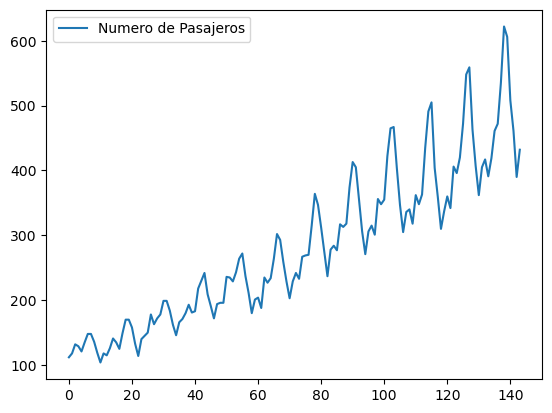

In [7]:
df.plot()
plt.show()

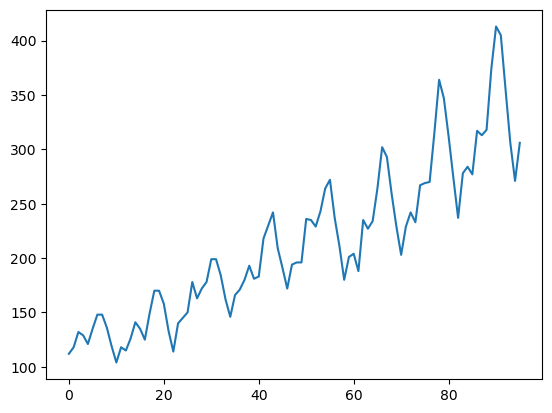

In [8]:
df1["Numero de Pasajeros"].plot()
plt.show()

Para tener una mejor presentacion de los datos vamos a definimos una funcion para graficar nuestros Data Frames/ Series de tiempo.

In [9]:
def plot_df(df, x, y, title="", xlabel='Fecha', ylabel='Numero de Pasajeros', colores="", dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=colores)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

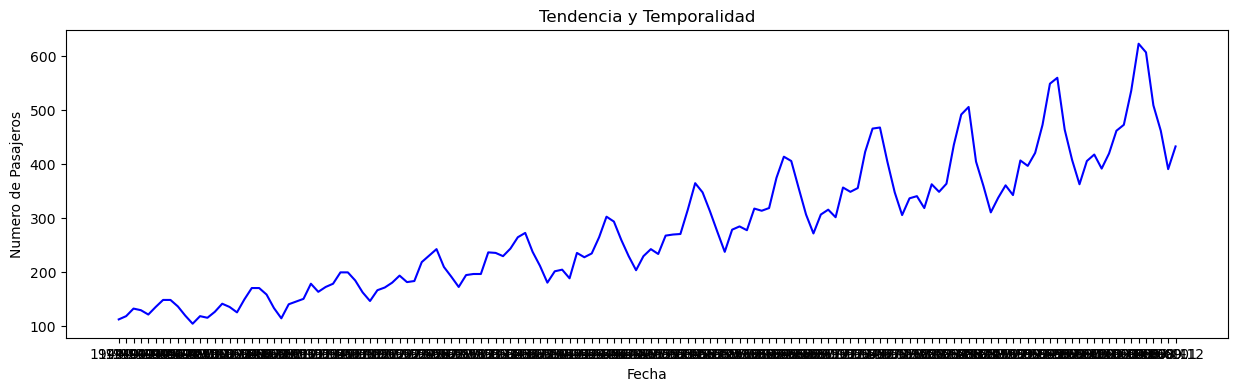

In [10]:
plot_df(df, x=df['Fechas'], y=df['Numero de Pasajeros'], title='Tendencia y Temporalidad', colores="blue")

Para el segundo Data Frame

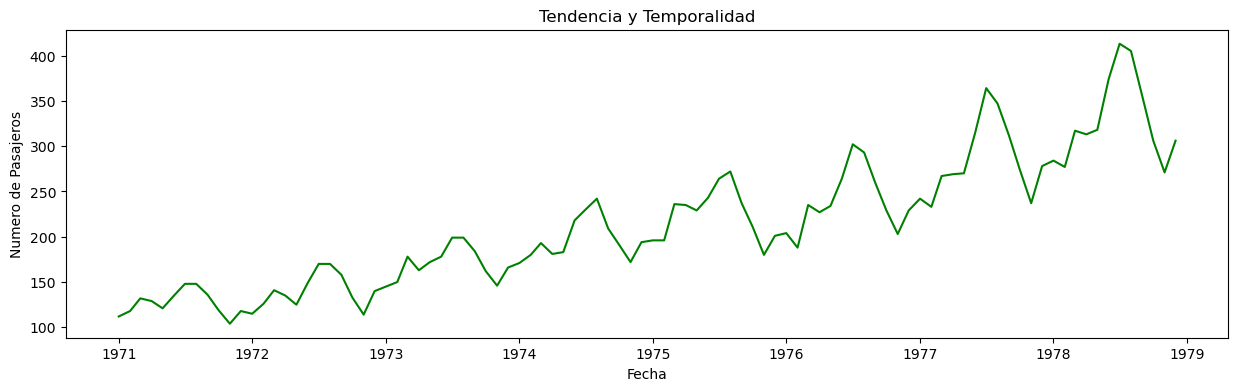

In [11]:
plot_df(df1, x=df1['Fechas'], y=df1['Numero de Pasajeros'], title='Tendencia y Temporalidad', colores="green")

## Graficas de Ejemplos

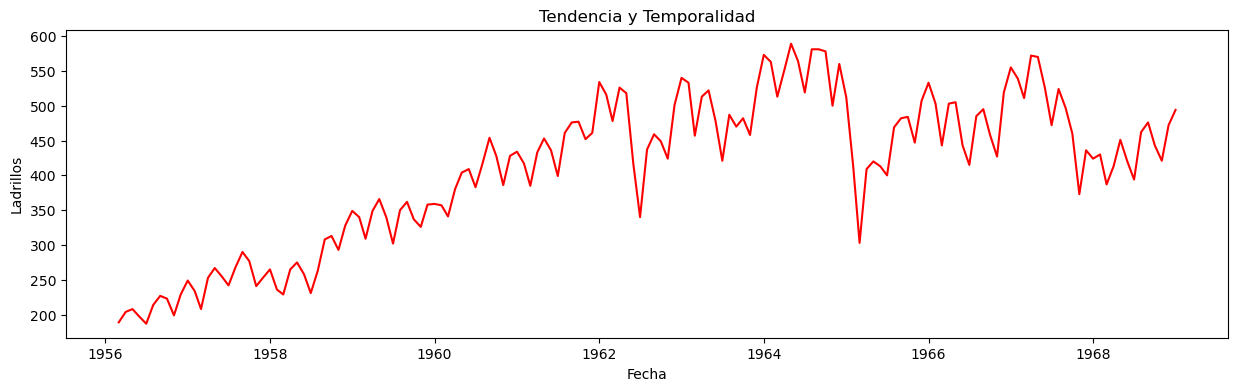

In [12]:
plot_df(ejemplo2, x=ejemplo2['Dates'], y=ejemplo2['Bricks'],ylabel="Ladrillos", title='Tendencia y Temporalidad', colores="red")

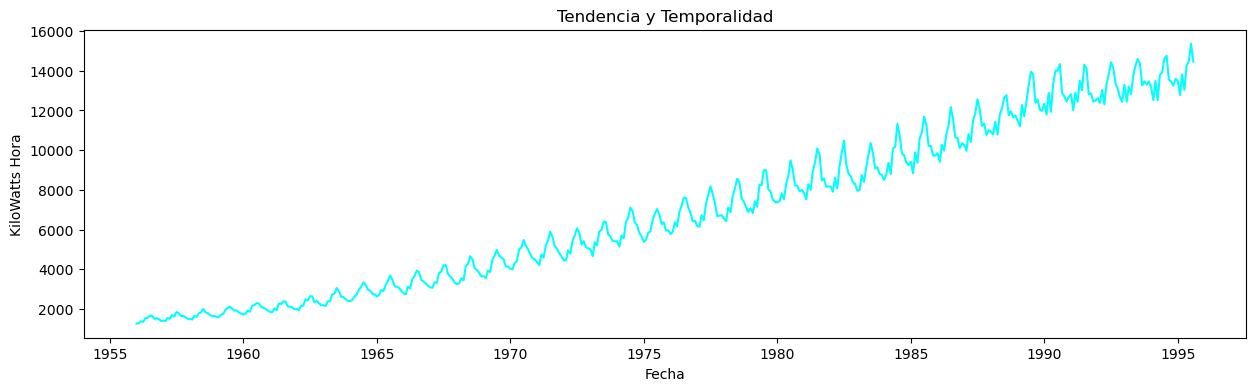

In [13]:
plot_df(ejemplo3, x=ejemplo3['Month and year'], y=ejemplo3['Kwh'],ylabel="KiloWatts Hora" ,title='Tendencia y Temporalidad', colores="cyan")

In [14]:
ejemplo6

,Month,HouseSales
0,1956-01-01,55
1,1956-02-01,60
2,1956-03-01,68
3,1956-04-01,63
4,1956-05-01,65
...,...,...
270,1978-07-01,64
271,1978-08-01,63
272,1978-09-01,55
273,1978-10-01,54


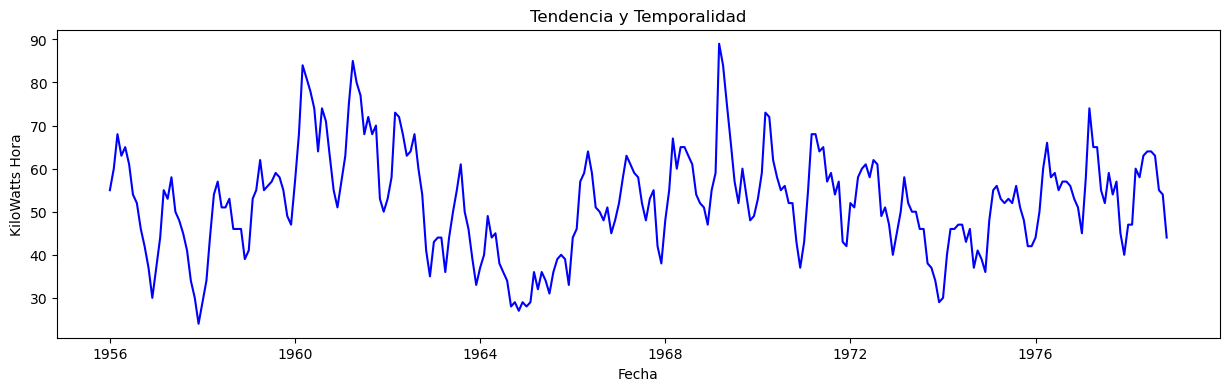

In [15]:
plot_df(ejemplo6, x=ejemplo6['Month'], y=ejemplo6['HouseSales'],ylabel="KiloWatts Hora" ,title='Tendencia y Temporalidad', colores="blue")

## Manejo de Archivos R y Graficas
Ahora vamos a ver como abrir archivos con datos asociados a ST en R, para ello instalamos la siguente libreria en Python o en su defecto trabajar directamente con R Studio o agun FrameWork para R.

In [16]:
#!pip install rpy2
%load_ext rpy2.ipython

Instalamos e importamos liberias de R que necesitaremos

In [17]:
from rpy2.robjects.packages import importr, data
utils = importr('utils')
base = importr('base')


#utils.install_packages('stats')
#utils.install_packages('lme4')
#utils.install_packages("ggplot2")
#utils.install_packages("tseries")
#utils.install_packages("fable")
#utils.install_packages("tsibble")
#utils.install_packages("dplyr")
#utils.install_packages("lubridate")
#utils.install_packages("feasts")

# library(fable) # en un entorno nativo de R se cargan las liberias asi. 
#feasts = importr("feasts")
lubridate = importr("lubridate")
dplyr = importr("dplyr")
#tsibble = importr("tsibble")
#fable = importr("fable")
#tseries= importr("tseries")
stats = importr('stats')
#lme4 = importr('lme4')
#ggplot2 = importr("ggplot2")

In [18]:
%%R
airline <- read.csv('AirPassengers.csv')
head(airline)

    Month X.Passengers
1 1949-01          112
2 1949-02          118
3 1949-03          132
4 1949-04          129
5 1949-05          121
6 1949-06          135


In [19]:
%%R
airline_TS <- ts(airline$X.Passengers,frequency = 12, start = c(1949, 1))
airline_TS

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432


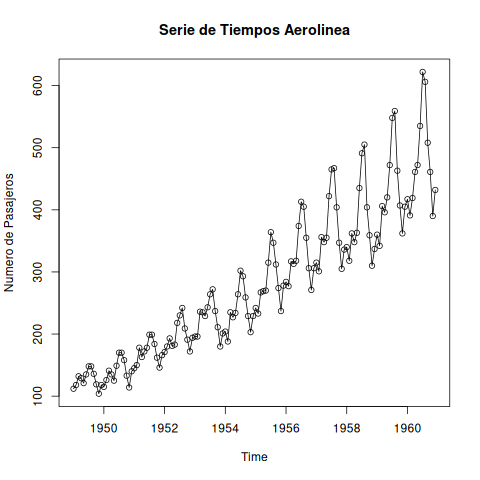

In [20]:
%%R
plot(airline_TS,type='o',ylab='Numero de Pasajeros',main='Serie de Tiempos Aerolinea')

# Descomposición de Series de Tiempo
En esta parte vamos a ver código que nos genera automáticamente una descomposición de las series temporales que tengamos a nuestra disposición.
Lo primero que vamos a hacer es importar la librería statsmodels cuyas rutinas nos serán útiles para modelar ST.

In [21]:
#! conda install statsmodels -y
from statsmodels.tsa.seasonal import seasonal_decompose

Sabemos que una serie temporal se puede descomponer considerando lo siguiente
$X_t =f(T_t,S_t,N_t)$. Los modelos más sencillos consisten en consideran una función aditiva $X_t =T_t+S_t+N_t$
o multiplicativa $S_t =T_t \times S_t \times N_t $, cuyos ejemplos prácticos e implementados automáticamente los encontramos en los siguientes códigos.

# Tendencias
existen multiples estrategias para estimar la tendencia de una serie de tiempo, cada una es adaptable dependiendop del tipo de serie que se tenga y el fenomeno que se intenta modelar.
Las estrategias mas comunes son las siguientes:

- Calcular la media de los datos.
- Usar algun modelo de regresion.
- Calcular medias moviles dependiendo de patrones estacionales.

A continuacion vemos como hacer estos calculos para la TS del ejemplo 2 y 3.

In [22]:
ejemplo2["Bricks"].mean()

np.float64(408.7935483870968)

In [23]:
ejemplo3["Kwh"].mean()

np.float64(6903.0672268907565)

## Medias Moviles

Para calcular medias moviles con Pandas

In [24]:
ma_eje1 = ejemplo2["Bricks"].rolling(6).mean()
std_ma_eje1 = ejemplo2["Bricks"].rolling(6).std()

Definimos una funcion para graficar la media movil

In [25]:
def plot_ts2(df, x, y, title="", xlabel='Fecha', ylabel='Numero de Pasajeros', colores="", dpi=100,MA=6):
    ma= y.rolling(MA).mean()
    std_ma=y.rolling(MA).std()
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, ma+std_ma, color="cyan")
    plt.plot(x, ma-std_ma, color="cyan")
    plt.fill_between(x, y1=ma+std_ma, y2=ma-std_ma, alpha=0.3, linewidth=2, color='cyan')
    plt.plot(x, ma, color="red", label="Media Movil")
    plt.plot(x, y, color=colores, label="Original")
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend(loc="best")
    plt.show()

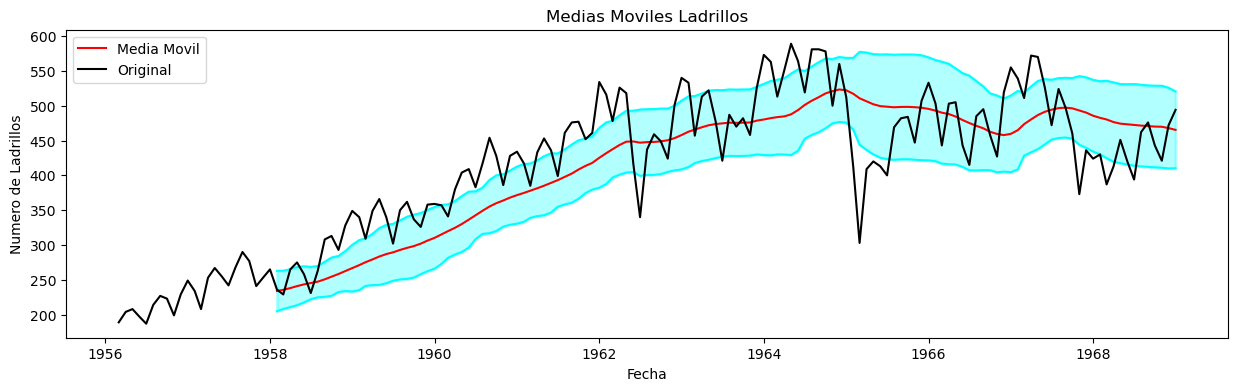

In [26]:
plot_ts2(ejemplo2, ejemplo2["Dates"],ejemplo2["Bricks"], title="Medias Moviles Ladrillos", xlabel='Fecha', ylabel='Numero de Ladrillos', colores="black",MA=24)

Creamos una grafica interactiva variando la ventana para el calculo de la media movil

In [27]:
import ipywidgets as widgets
def graf_ma(l):
    w=plot_ts2(ejemplo2, ejemplo2["Dates"],ejemplo2["Bricks"], title="Medias Moviles Ladrillos", xlabel='Fecha', ylabel='Numero de Ladrillos', colores="black",MA=l)

In [28]:
widgets.interact(graf_ma, l=(2,24))

interactive(children=(IntSlider(value=13, description='l', max=24, min=2), Output()), _dom_classes=('widget-in…

<function __main__.graf_ma(l)>

# Descomposicion con Paquetes de Software

Hacemos la descomposicion de la serie de tiempos de pasajeros de aerolinea.

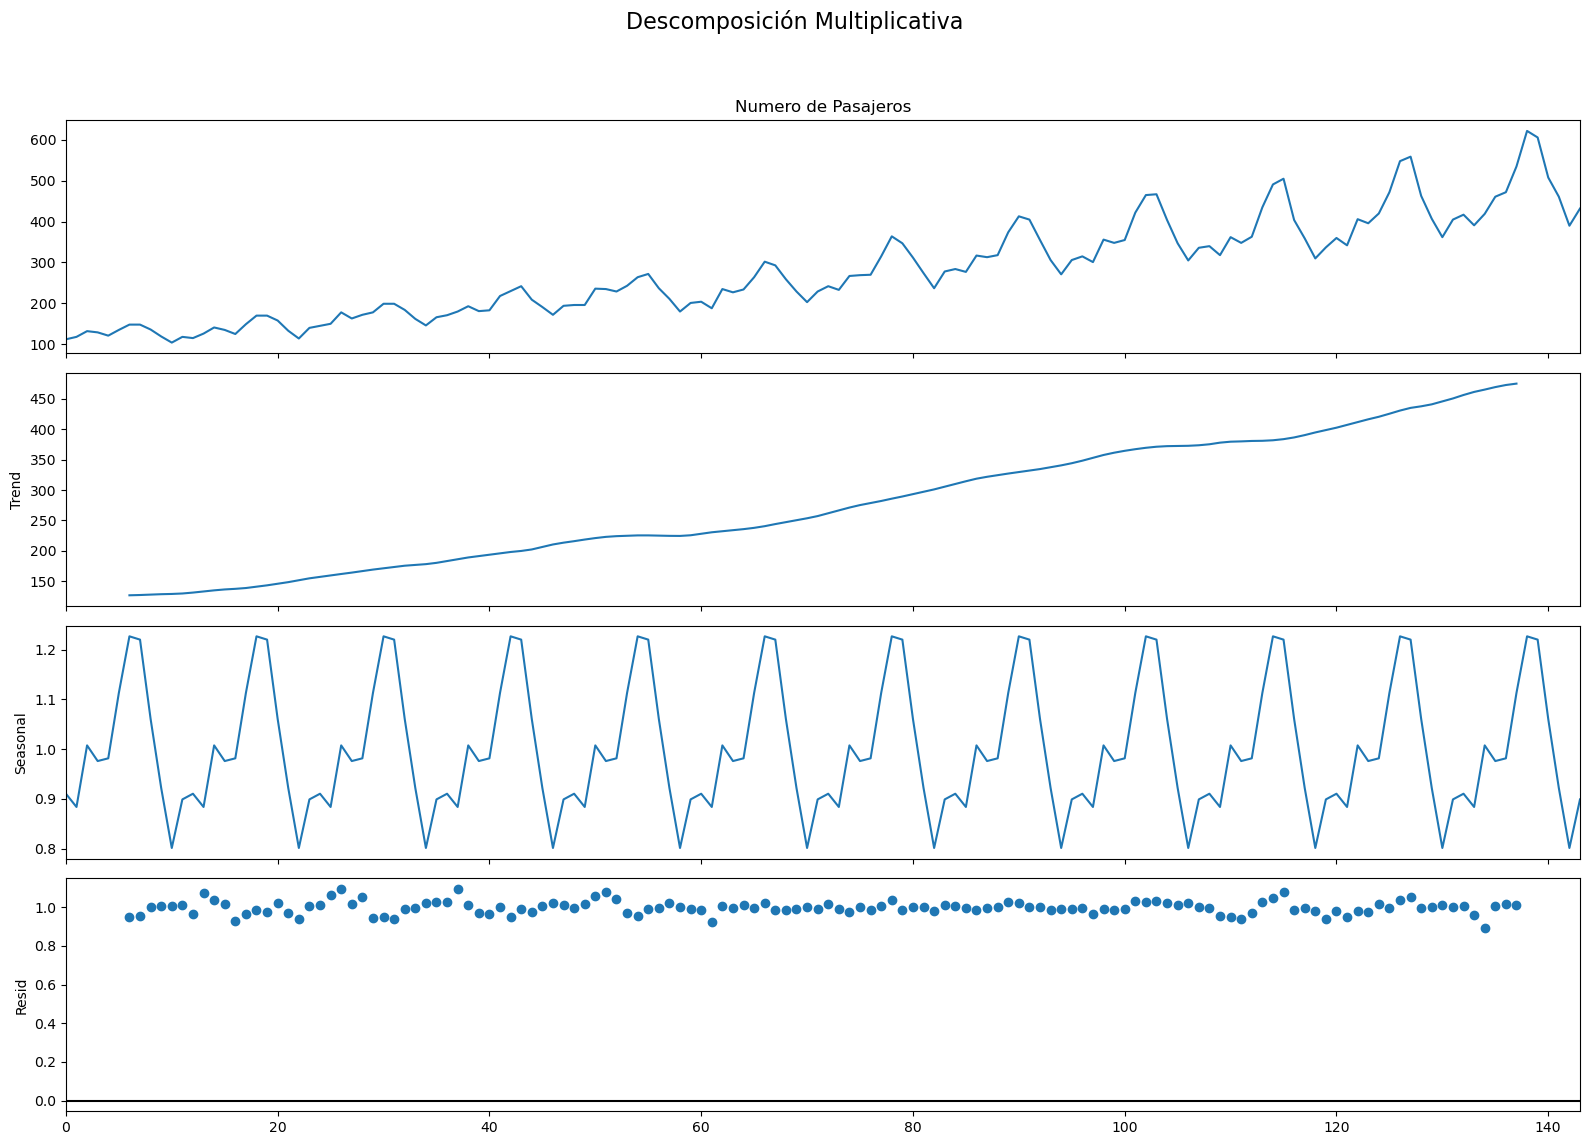

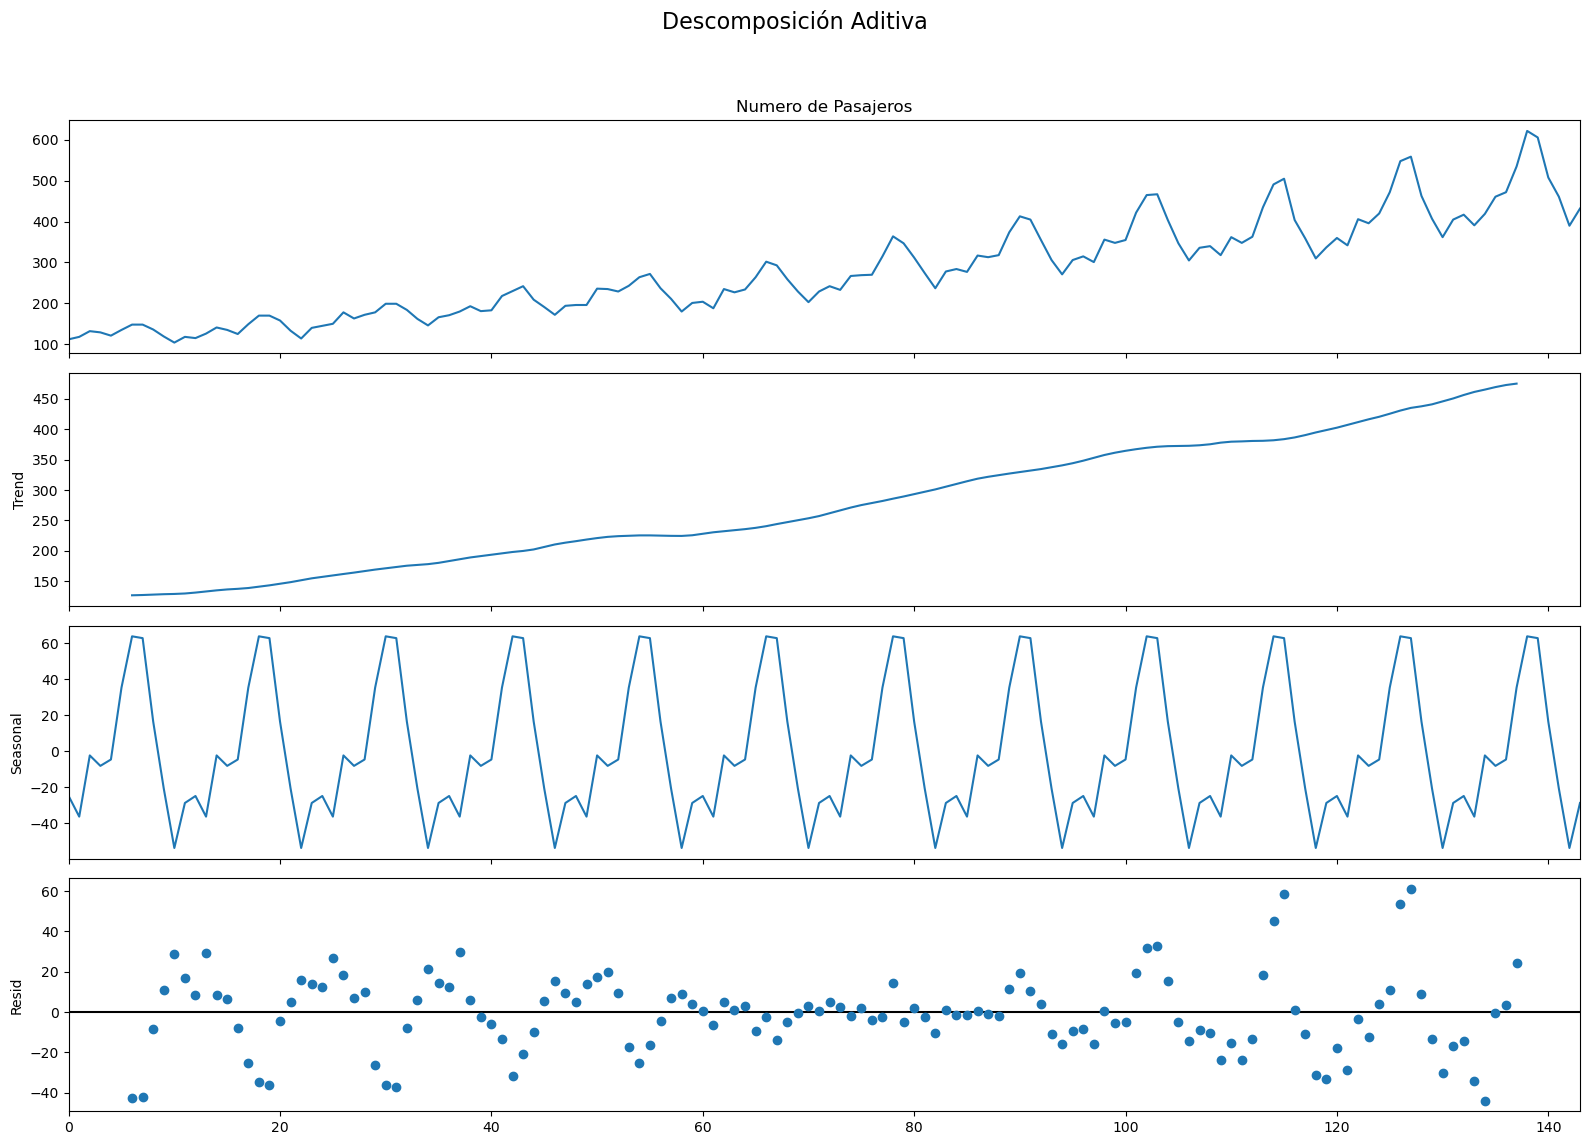

In [29]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Numero de Pasajeros'], model='multiplicative', period=12)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Numero de Pasajeros'], model='additive', period=12)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})

multiplicative_decomposition.plot().suptitle('Descomposición Multiplicativa', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Descomposición Aditiva', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Hacemos descomposicion de la serie de tiempo de ladrillos

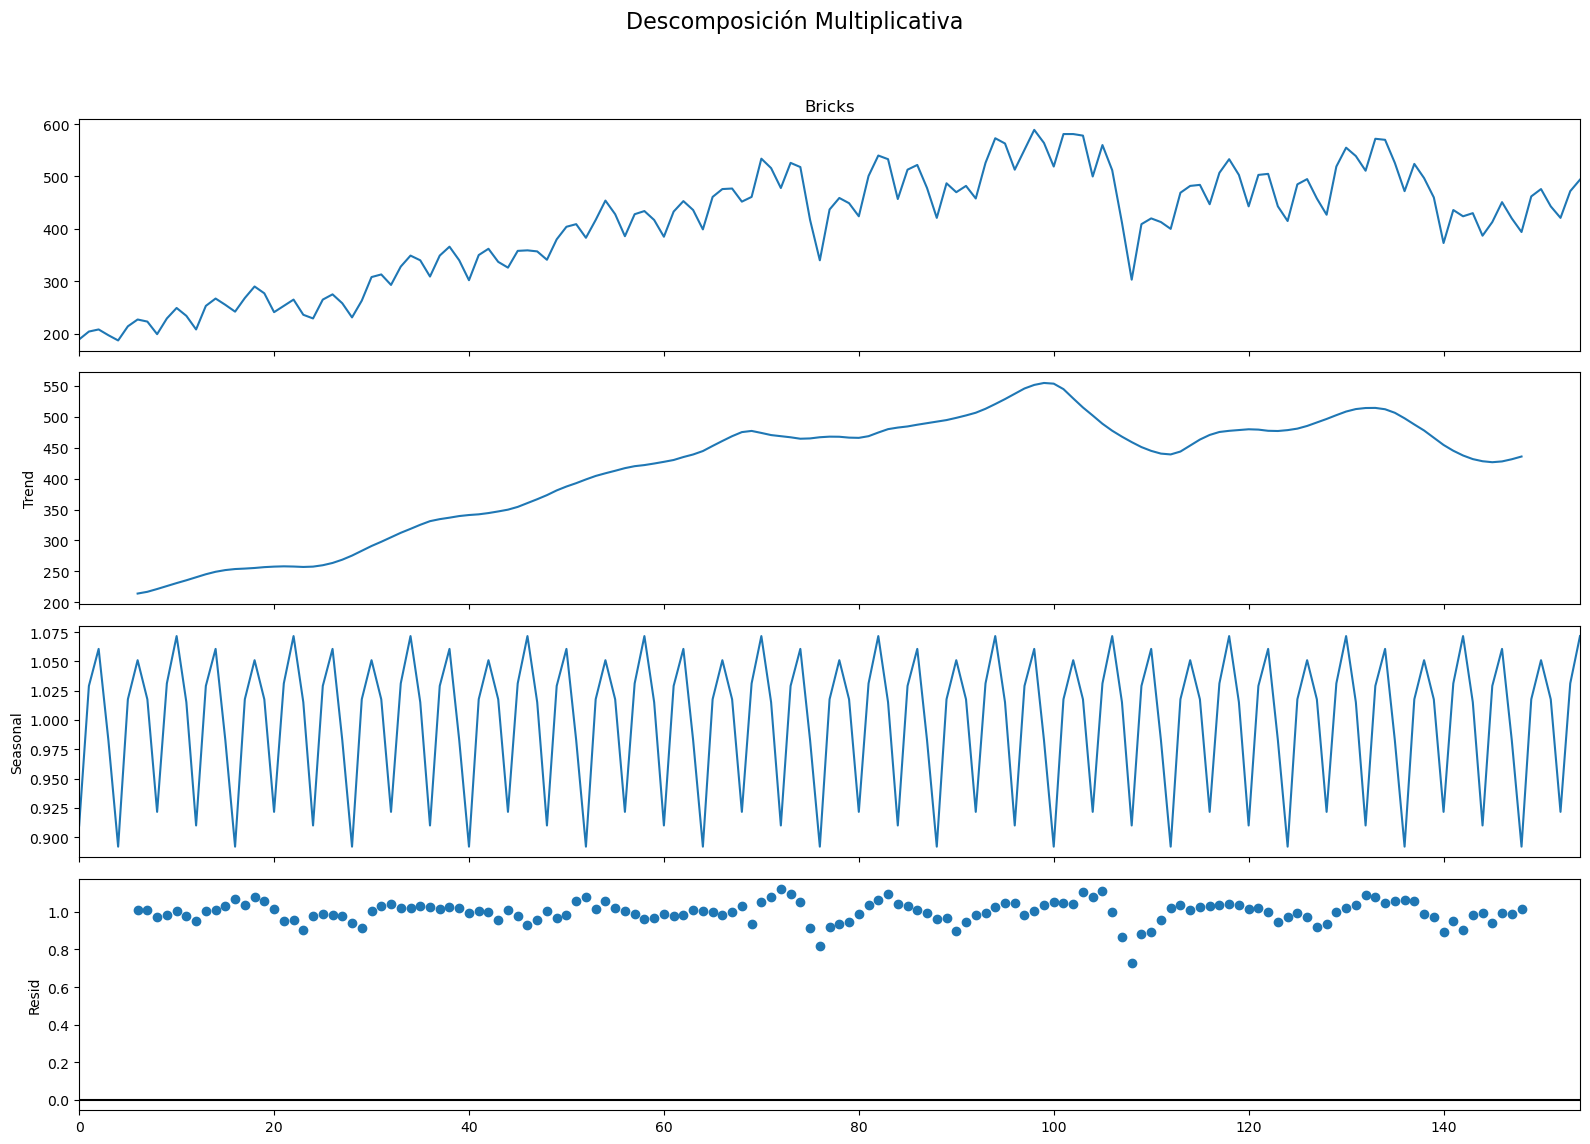

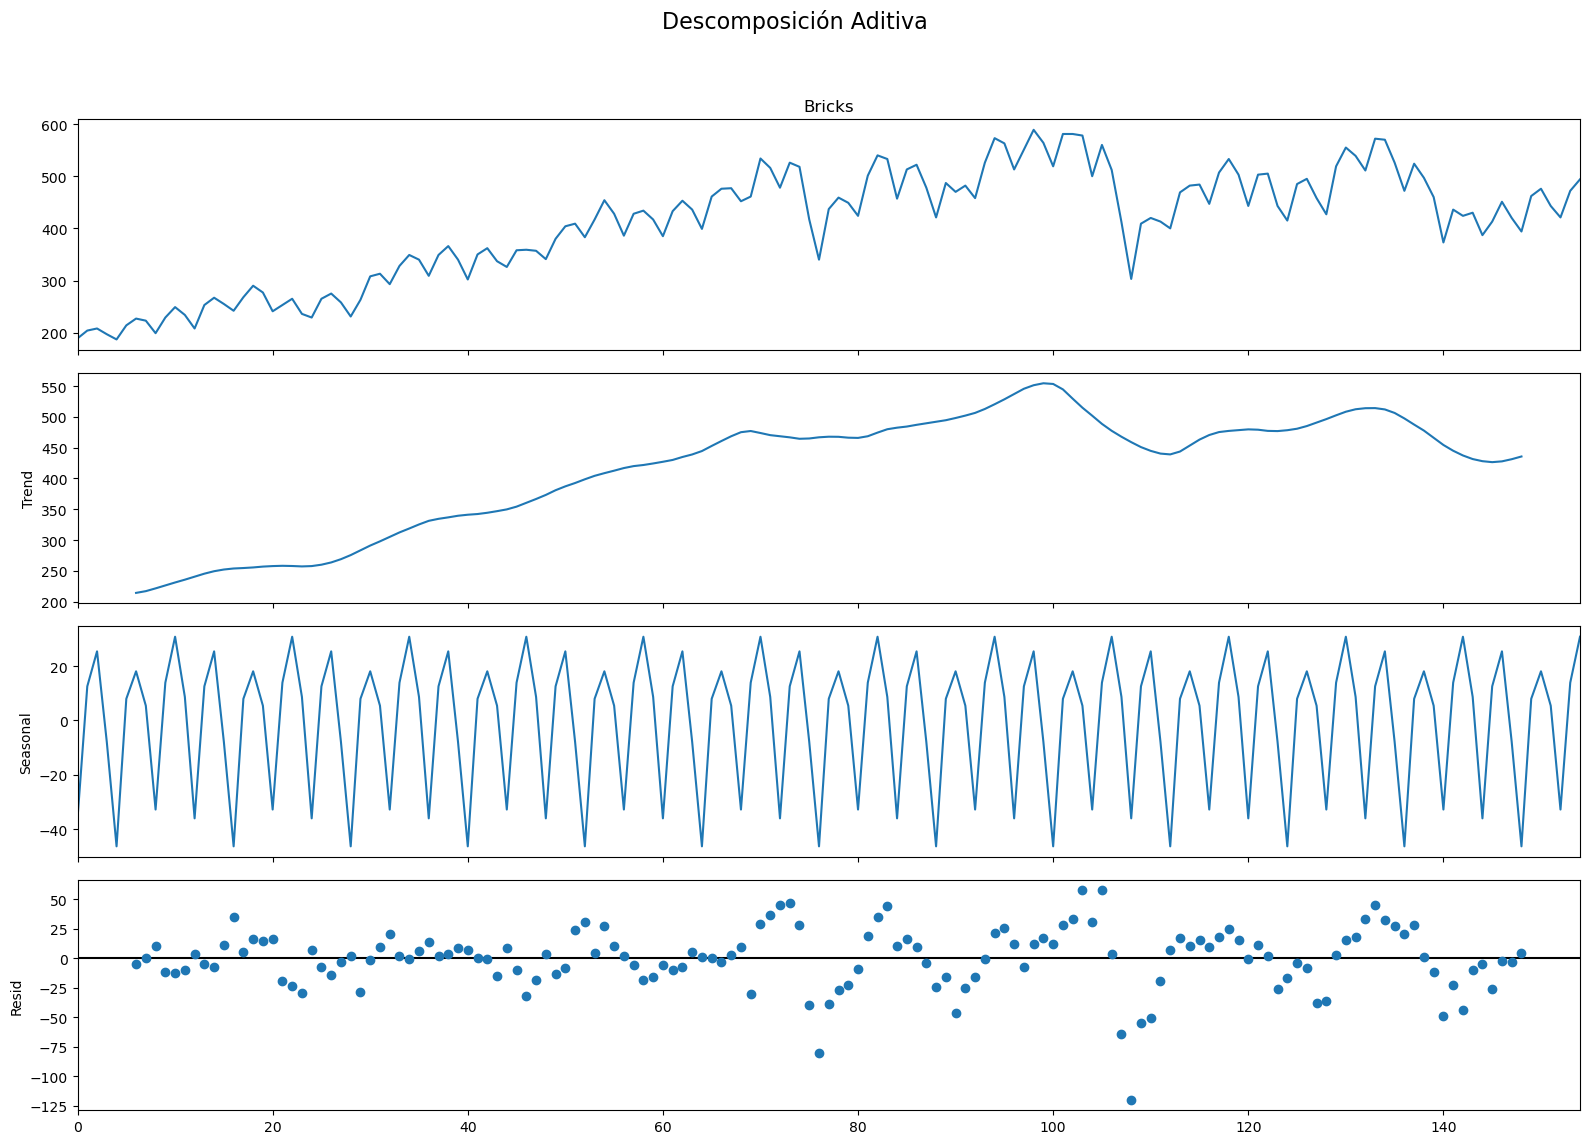

In [30]:
# Multiplicative Decomposition 
multiplicative_decomposition2 = seasonal_decompose(ejemplo2['Bricks'], model='multiplicative', period=12)

# Additive Decomposition
additive_decomposition2 = seasonal_decompose(ejemplo2['Bricks'], model='additive', period=12)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition2.plot().suptitle('Descomposición Multiplicativa', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition2.plot().suptitle('Descomposición Aditiva', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Descomposicion de la serie de consumo de energia

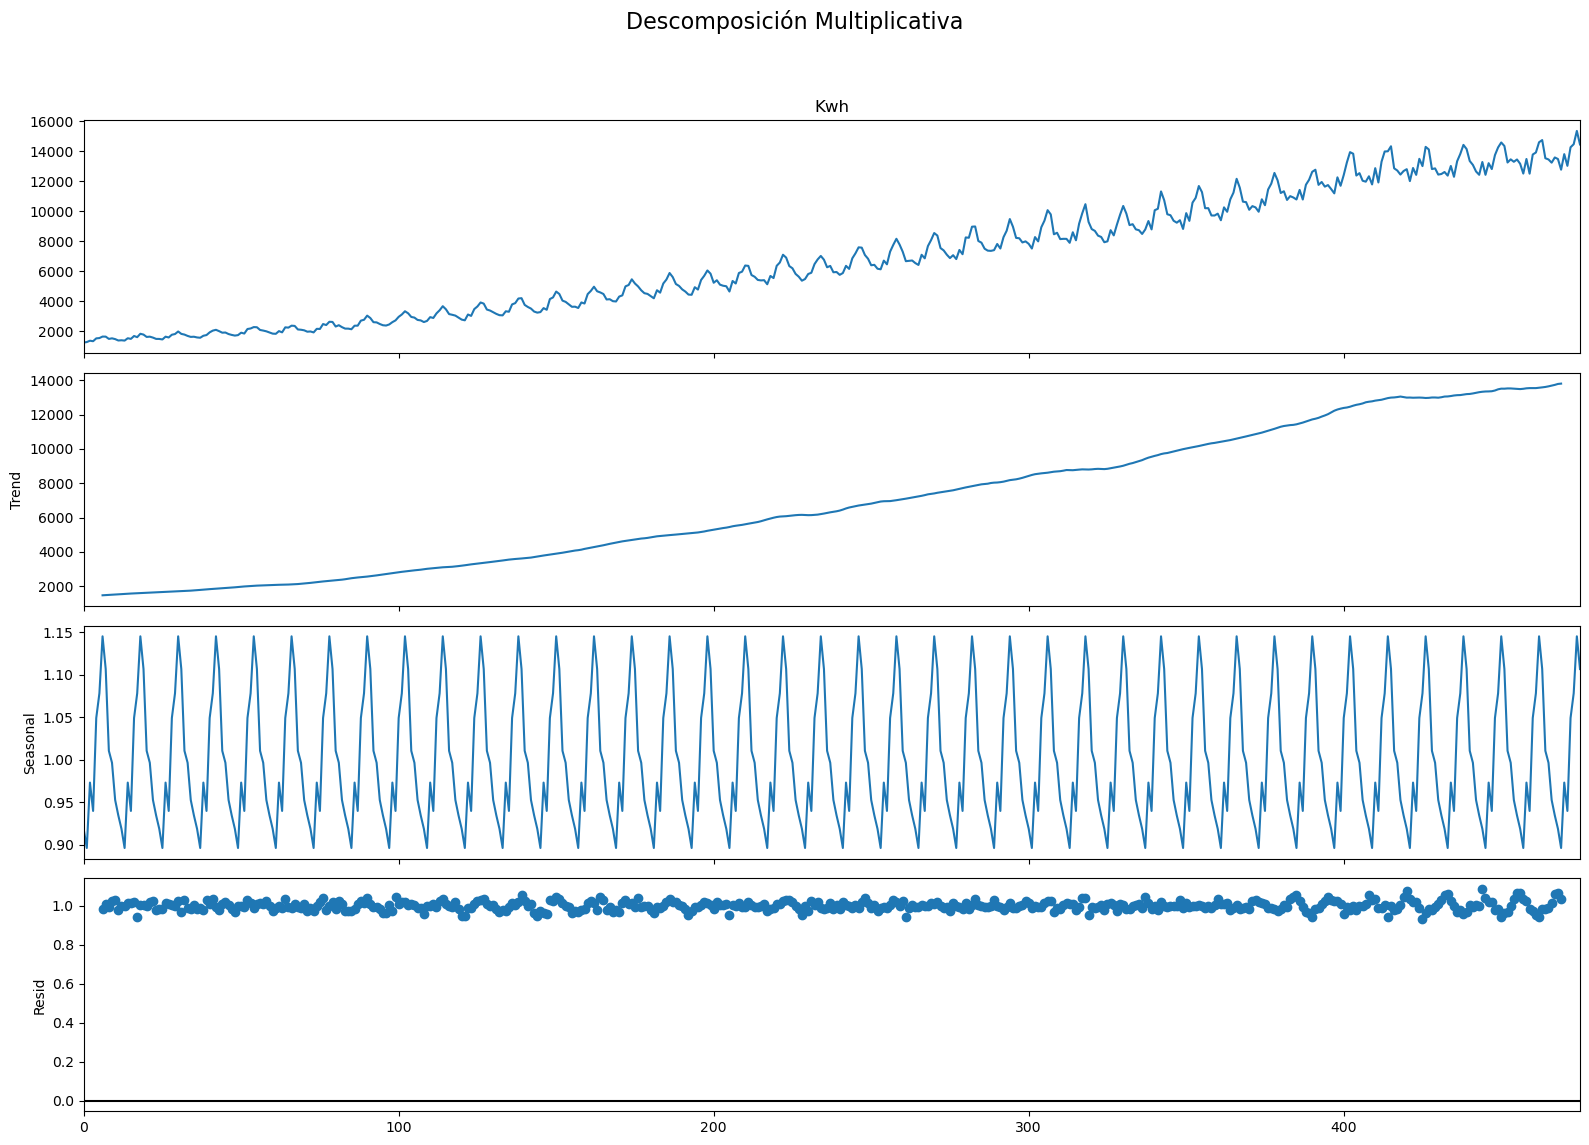

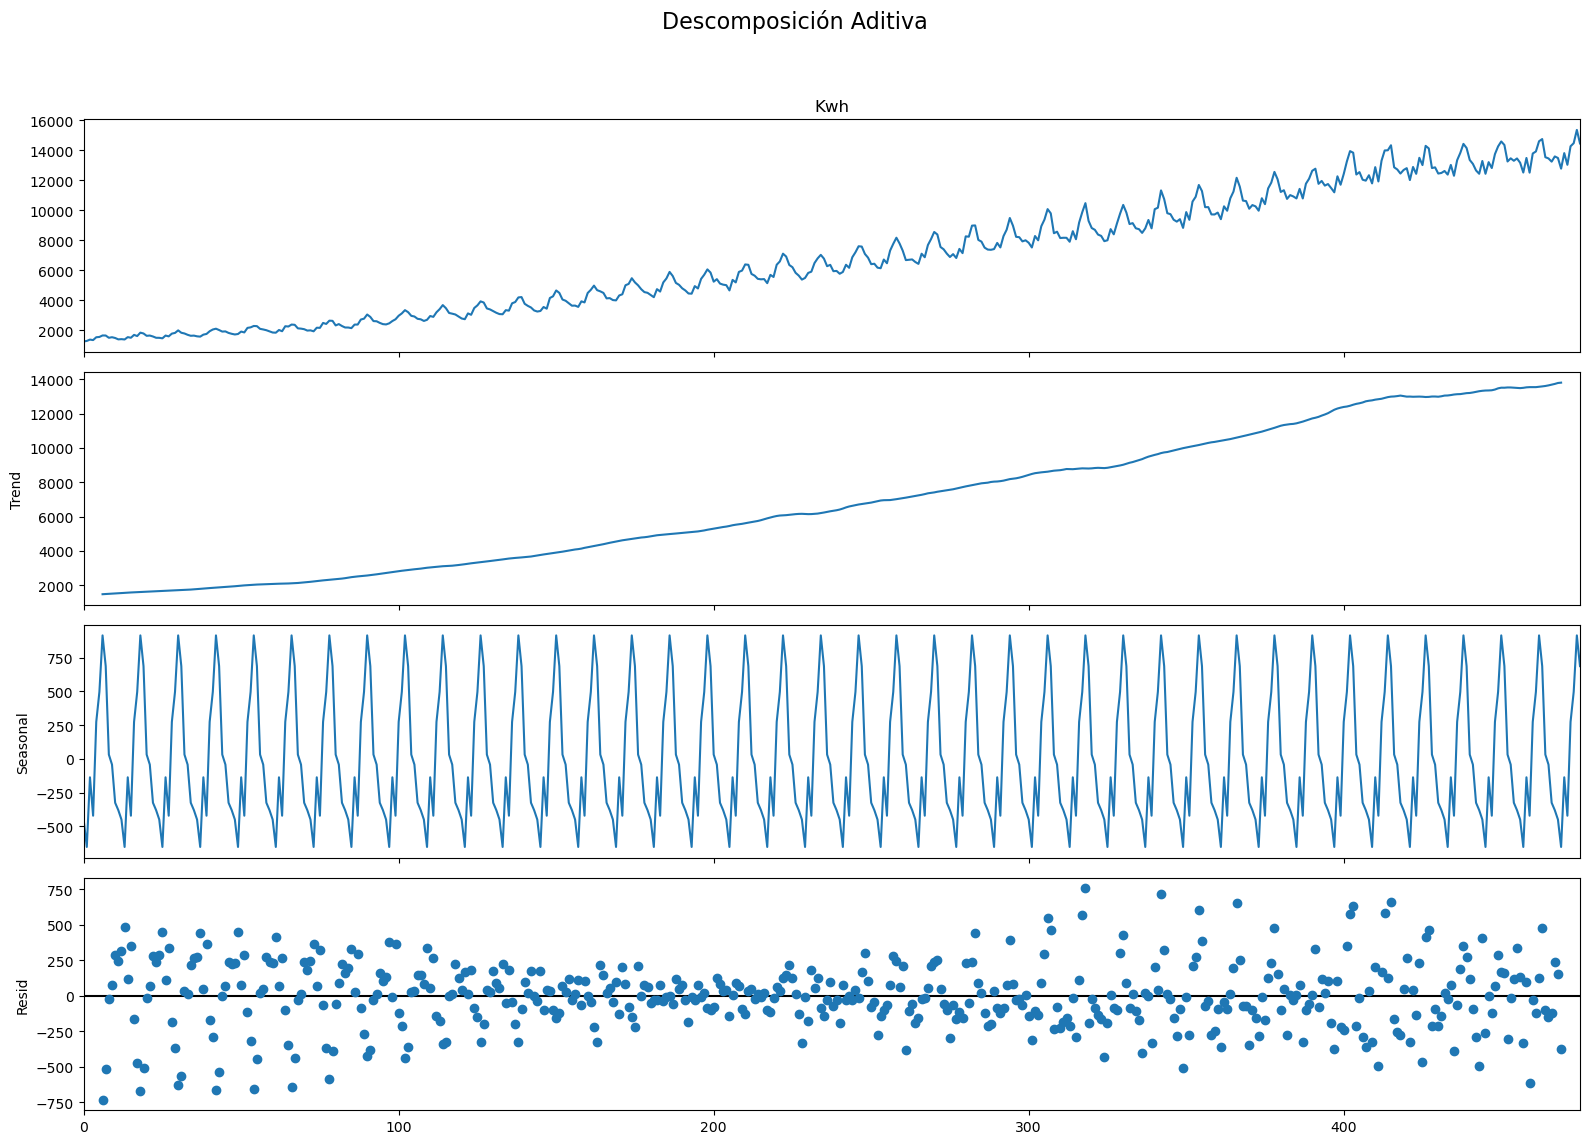

In [31]:
# Multiplicative Decomposition 
multiplicative_decomposition3 = seasonal_decompose(ejemplo3['Kwh'], model='multiplicative', period=12)

# Additive Decomposition
additive_decomposition3 = seasonal_decompose(ejemplo3['Kwh'], model='additive', period=12)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition3.plot().suptitle('Descomposición Multiplicativa', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition3.plot().suptitle('Descomposición Aditiva', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# Descomposicion en R

In [32]:
#utils.install_packages("readxl")
#utils.install_packages("TSstudio")

#TSstudio = importr("TSstudio")    
readxl = importr("readxl")

# A tibble: 155 × 2


   Dates               Bricks
   <dttm>               <dbl>
 1 1956-03-01 00:00:00    189
 2 1956-04-01 00:00:00    204
 3 1956-05-01 00:00:00    208
 4 1956-06-01 00:00:00    197
 5 1956-07-01 00:00:00    187
 6 1956-08-01 00:00:00    214
 7 1956-09-01 00:00:00    227
 8 1956-10-01 00:00:00    223
 9 1956-11-01 00:00:00    199
10 1956-12-01 00:00:00    229
# ℹ 145 more rows
# ℹ Use `print(n = ...)` to see more rows


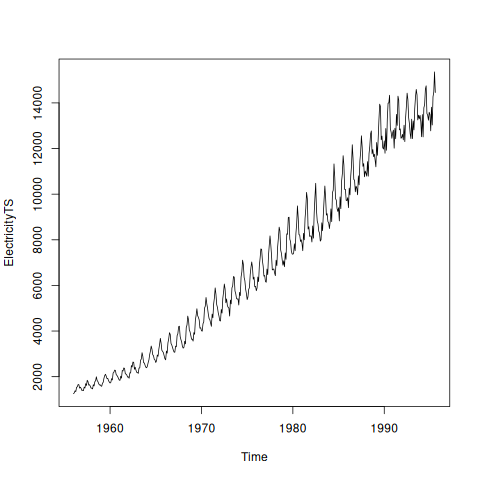

In [33]:
%%R
# Abrimos los archivos .xls
Bricks <- read_excel('ClayBricks.xls')
Electricity <- read_excel('Electricity.xls')

# Construimos la TS 

BricksTS <- ts(Bricks$Bricks,frequency = 12, start = c(1946, 3))
ElectricityTS <- ts(Electricity$Kwh,frequency = 12, start = c(1956, 1))

#plot.ts(BricksTS)
plot.ts(ElectricityTS)
#ts_decompose(BricksTS, type = "both")
Bricks

In [34]:
%%R 
BricksTS

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1946         189 204 208 197 187 214 227 223 199 229
1947 249 234 208 253 267 255 242 268 290 277 241 253
1948 265 236 229 265 275 258 231 263 308 313 293 328
1949 349 340 309 349 366 340 302 350 362 337 326 358
1950 359 357 341 380 404 409 383 417 454 428 386 428
1951 434 417 385 433 453 436 399 461 476 477 452 461
1952 534 516 478 526 518 417 340 437 459 449 424 501
1953 540 533 457 513 522 478 421 487 470 482 458 526
1954 573 563 513 551 589 564 519 581 581 578 500 560
1955 512 412 303 409 420 413 400 469 482 484 447 507
1956 533 503 443 503 505 443 415 485 495 458 427 519
1957 555 539 511 572 570 526 472 524 497 460 373 436
1958 424 430 387 413 451 420 394 462 476 443 421 472
1959 494                                            


In [35]:
%%R
BricksTS_Da <- decompose(BricksTS)
BricksTS_Da

$x
     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1946         189 204 208 197 187 214 227 223 199 229
1947 249 234 208 253 267 255 242 268 290 277 241 253
1948 265 236 229 265 275 258 231 263 308 313 293 328
1949 349 340 309 349 366 340 302 350 362 337 326 358
1950 359 357 341 380 404 409 383 417 454 428 386 428
1951 434 417 385 433 453 436 399 461 476 477 452 461
1952 534 516 478 526 518 417 340 437 459 449 424 501
1953 540 533 457 513 522 478 421 487 470 482 458 526
1954 573 563 513 551 589 564 519 581 581 578 500 560
1955 512 412 303 409 420 413 400 469 482 484 447 507
1956 533 503 443 503 505 443 415 485 495 458 427 519
1957 555 539 511 572 570 526 472 524 497 460 373 436
1958 424 430 387 413 451 420 394 462 476 443 421 472
1959 494                                            

$seasonal
            Jan        Feb        Mar        Apr        May        Jun
1946                       -36.037800  12.583728  25.465672  -7.898911
1947  30.851089   8.687895 -36.037800  12.583728 

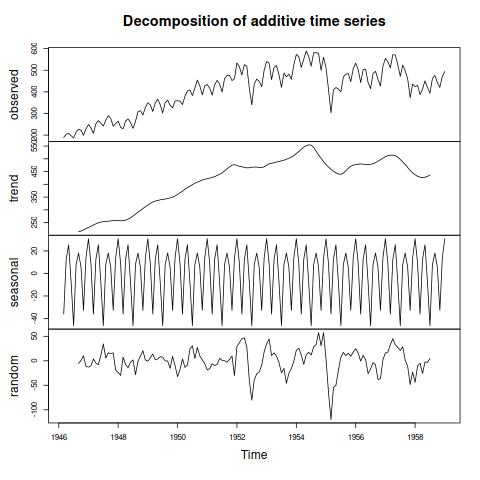

In [36]:
%%R
plot(BricksTS_Da)

In [37]:
%%R
BricksTS_Dm <- decompose(BricksTS,type = "multiplicative")
BricksTS_Dm

$x
     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1946         189 204 208 197 187 214 227 223 199 229
1947 249 234 208 253 267 255 242 268 290 277 241 253
1948 265 236 229 265 275 258 231 263 308 313 293 328
1949 349 340 309 349 366 340 302 350 362 337 326 358
1950 359 357 341 380 404 409 383 417 454 428 386 428
1951 434 417 385 433 453 436 399 461 476 477 452 461
1952 534 516 478 526 518 417 340 437 459 449 424 501
1953 540 533 457 513 522 478 421 487 470 482 458 526
1954 573 563 513 551 589 564 519 581 581 578 500 560
1955 512 412 303 409 420 413 400 469 482 484 447 507
1956 533 503 443 503 505 443 415 485 495 458 427 519
1957 555 539 511 572 570 526 472 524 497 460 373 436
1958 424 430 387 413 451 420 394 462 476 443 421 472
1959 494                                            

$seasonal
           Jan       Feb       Mar       Apr       May       Jun       Jul
1946                     0.9100034 1.0290191 1.0606193 0.9827213 0.8919431
1947 1.0715541 1.0151491 0.9100034 1.0290

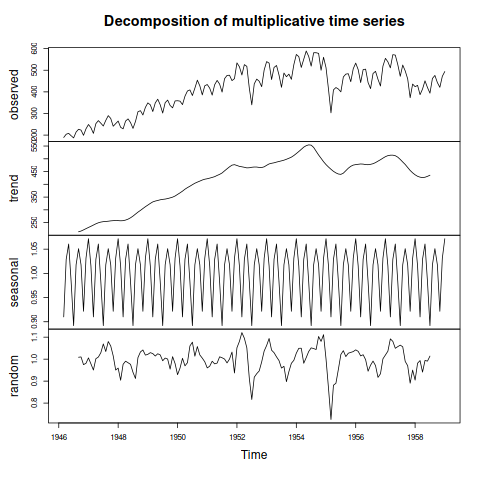

In [38]:
%%R
plot(BricksTS_Dm)

# Referencias 

+ https://rpubs.com/davoodastaraky/TSA1 
+ https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python/notebook
+ https://link.springer.com/article/10.1007/s43069-022-00179-z


# Segunda Parte ACF y PACF

In [39]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

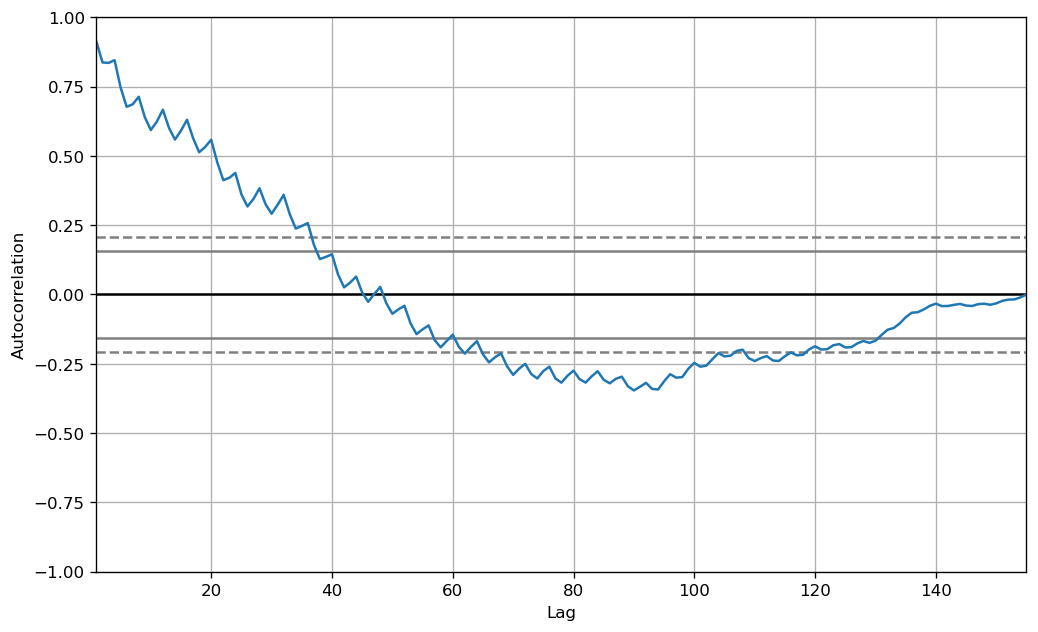

In [40]:
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(ejemplo2["Bricks"].tolist())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

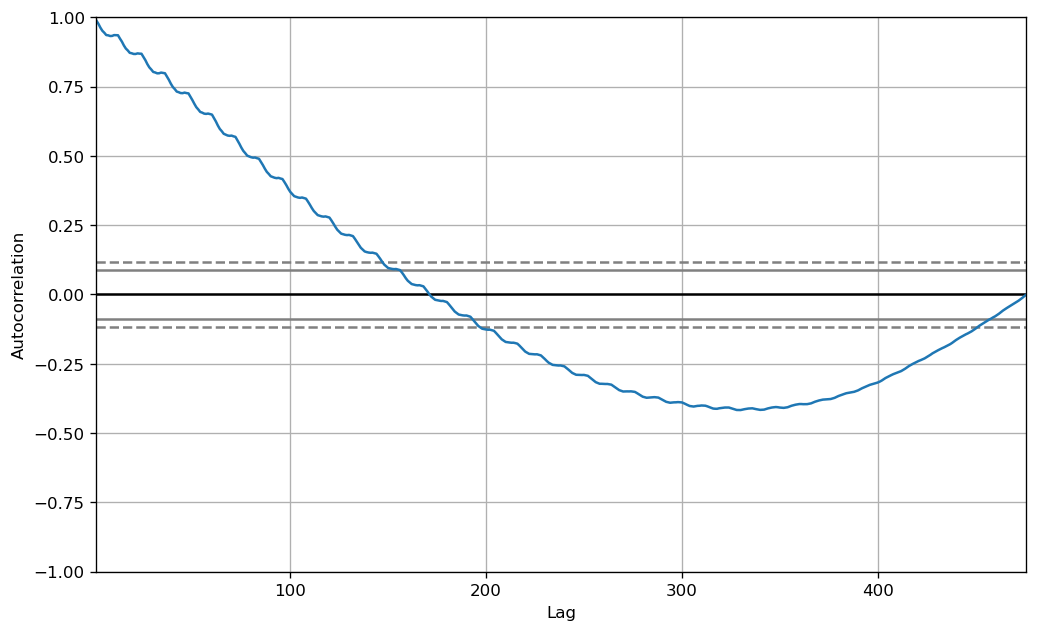

In [41]:
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(ejemplo3["Kwh"].tolist())

Simulemos un Ruido blanco para poder graficar son ACF

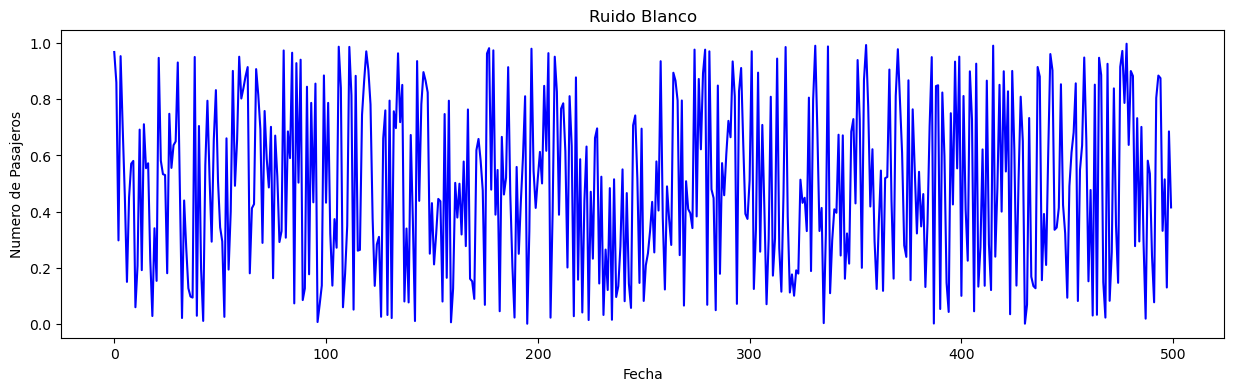

In [42]:
n=500
ruido = np.random.rand(n)
ruido_df=pd.Series(ruido)
plot_df(ruido_df, x=range(n), y=ruido_df, title='Ruido Blanco', colores="blue")

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

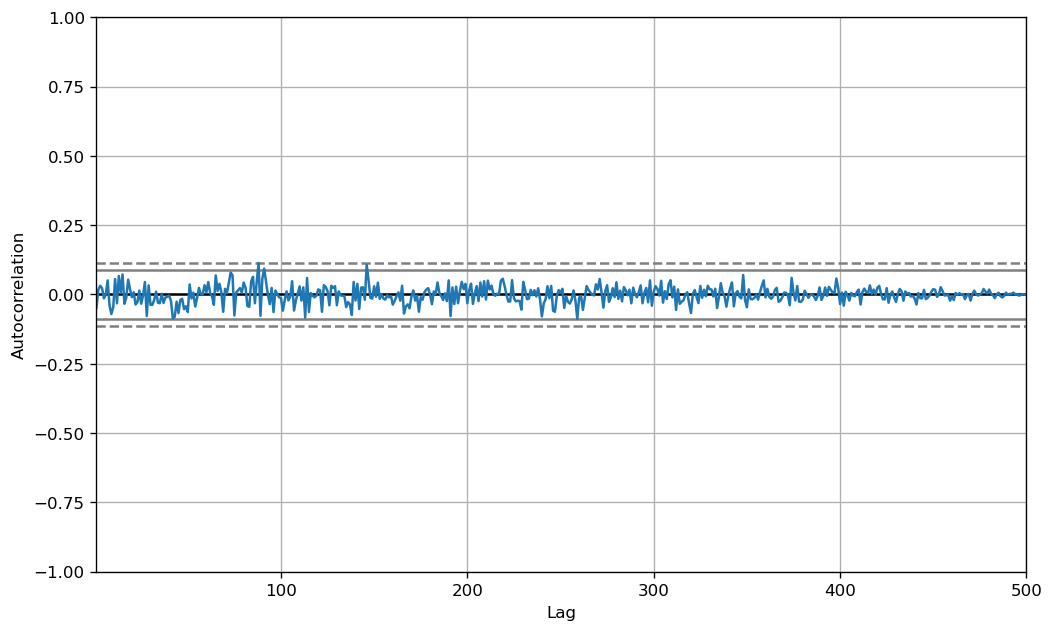

In [43]:
autocorrelation_plot(ruido_df)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

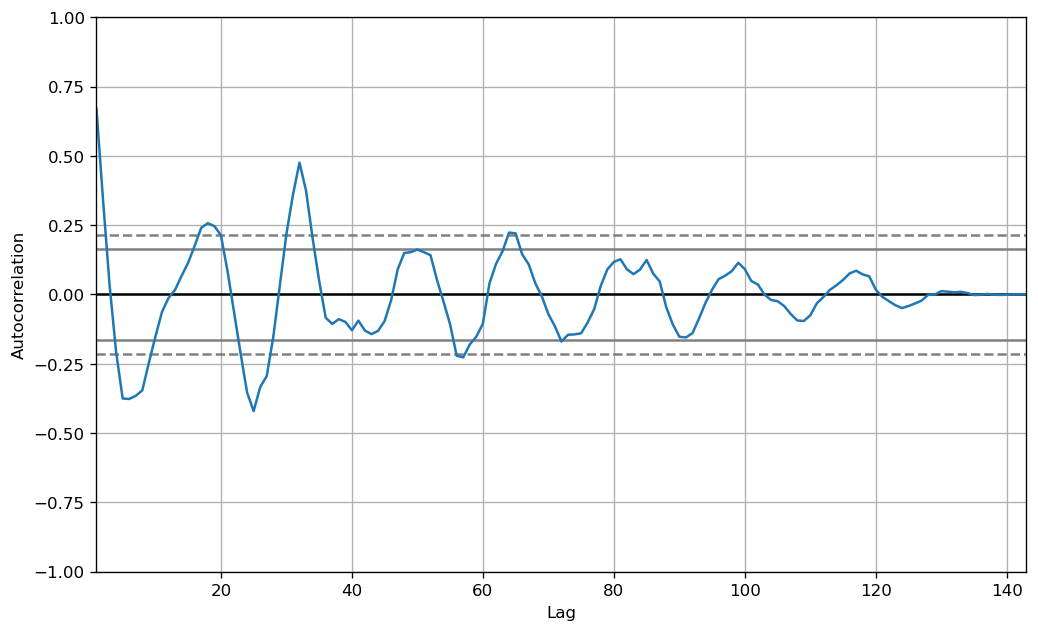

In [44]:
residuos2_1= multiplicative_decomposition2.resid
autocorrelation_plot(residuos2_1.dropna())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

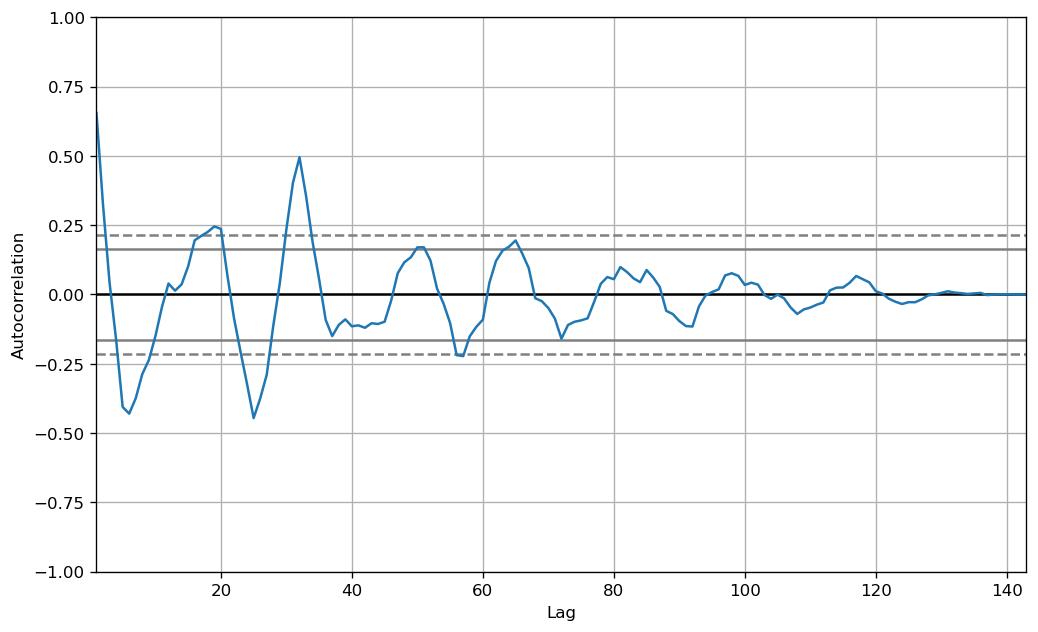

In [45]:
residuos2_2= additive_decomposition2.resid
autocorrelation_plot(residuos2_2.dropna())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

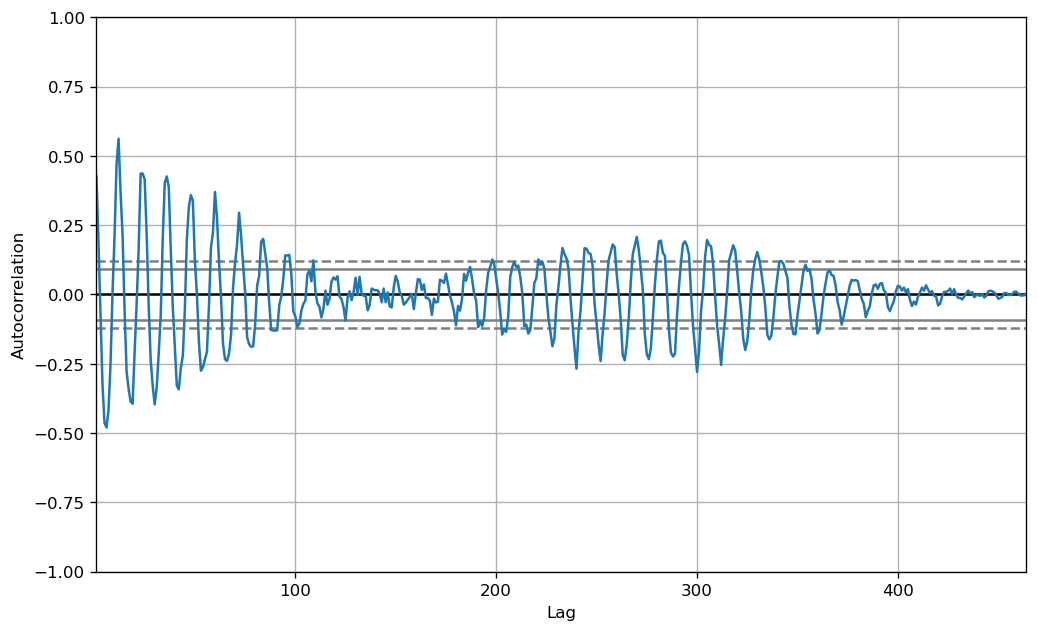

In [46]:
residuos3_1= multiplicative_decomposition3.resid
autocorrelation_plot(residuos3_1.dropna())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

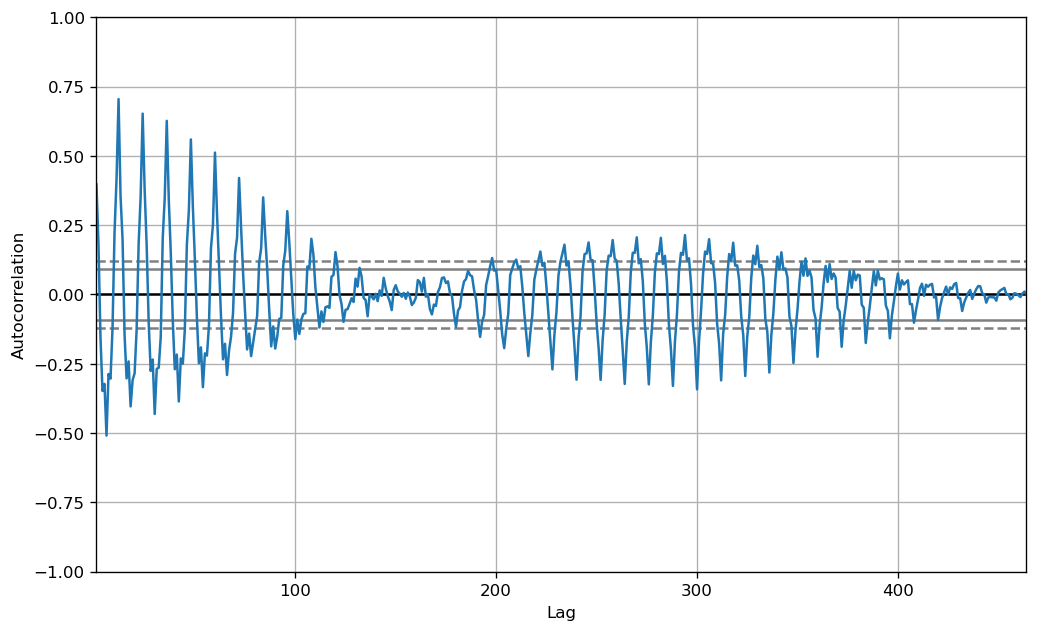

In [47]:
residuos3_2= additive_decomposition3.resid
autocorrelation_plot(residuos3_2.dropna())

Otro paquete que nos permite graficar la ACF y PACF es statsmodels

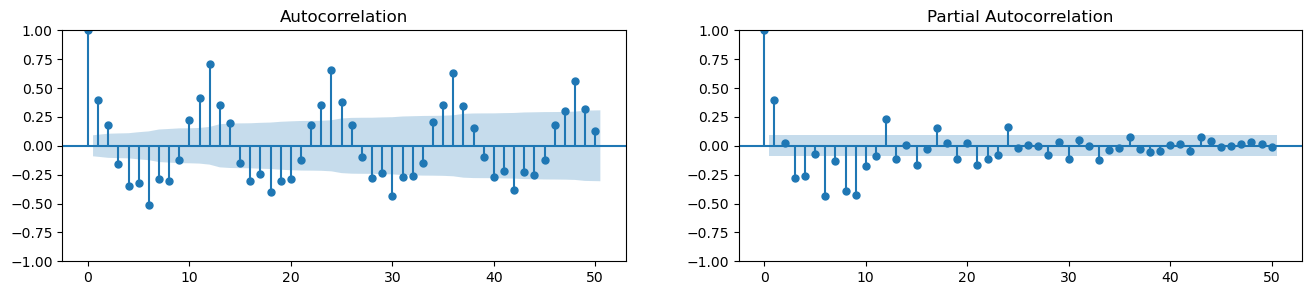

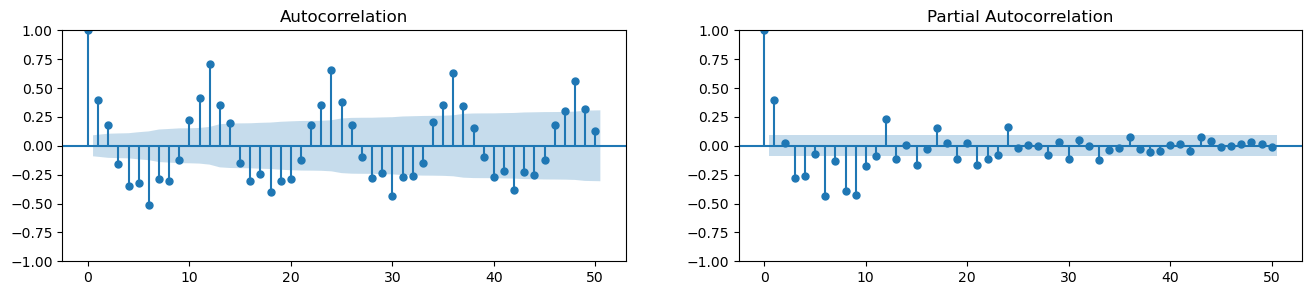

In [48]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficas
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(residuos3_2.dropna(), lags=50, ax=axes[0])
plot_pacf(residuos3_2.dropna(), lags=50, ax=axes[1])

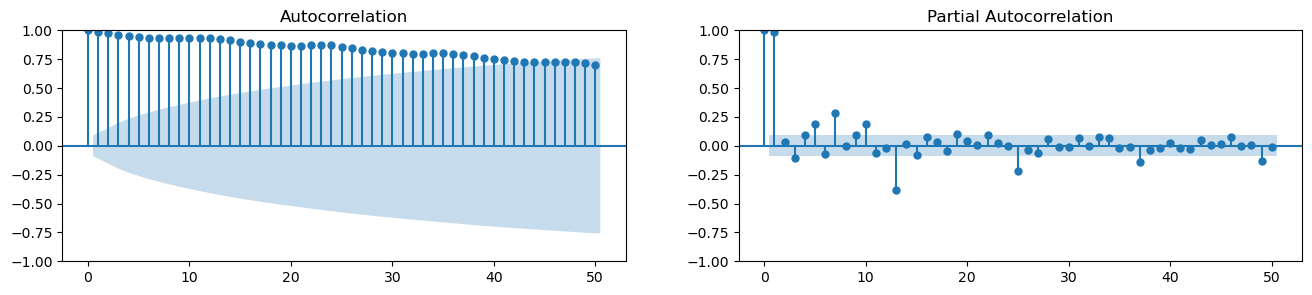

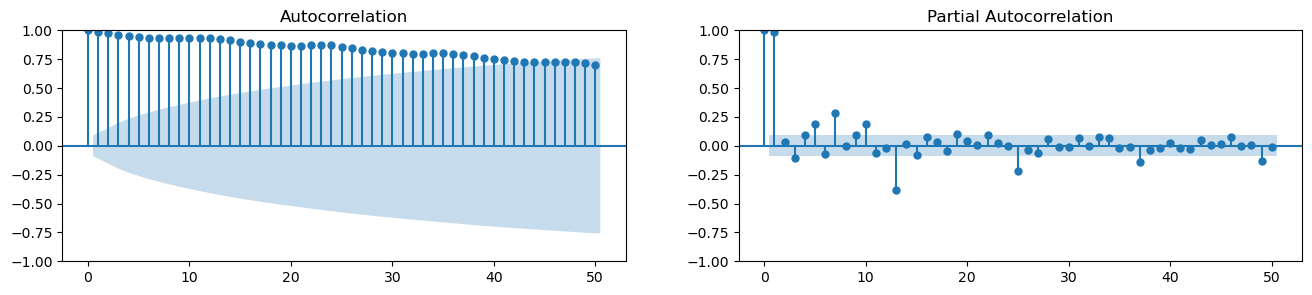

In [49]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(ejemplo3["Kwh"].tolist(), lags=50, ax=axes[0])
plot_pacf(ejemplo3["Kwh"].tolist(), lags=50, ax=axes[1])

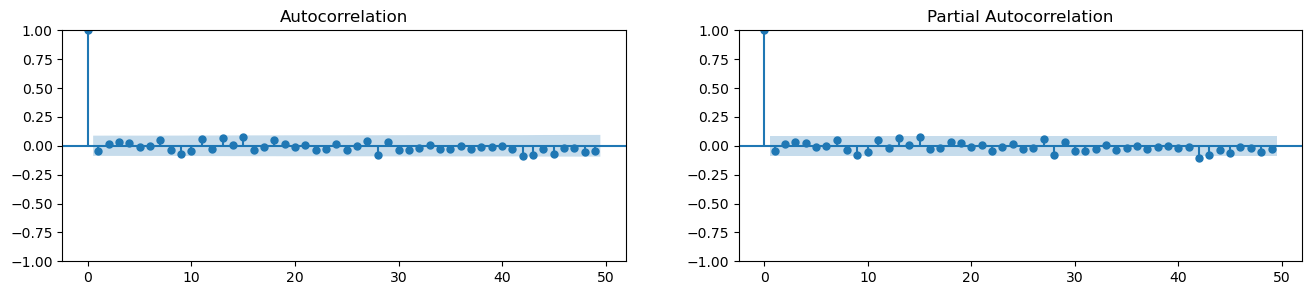

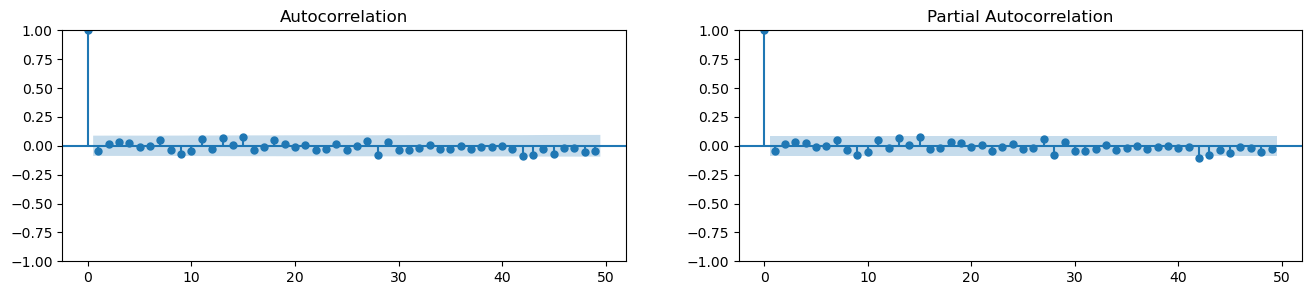

In [50]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(ruido, lags=49, ax=axes[0])
plot_pacf(ruido, lags=49, ax=axes[1])

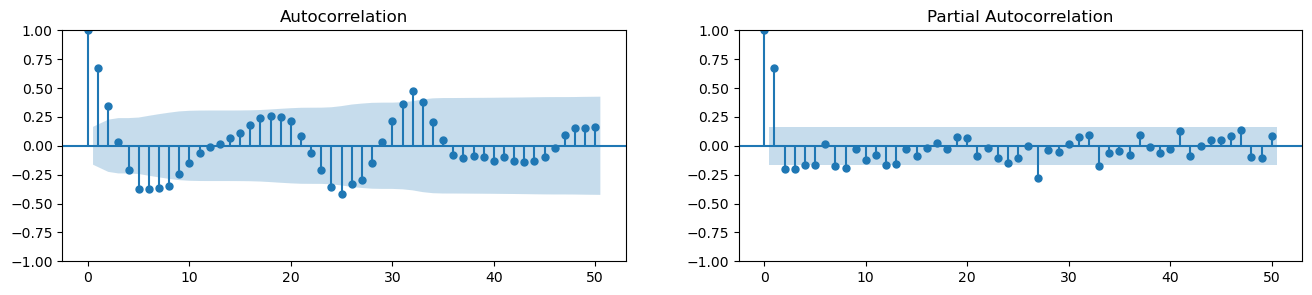

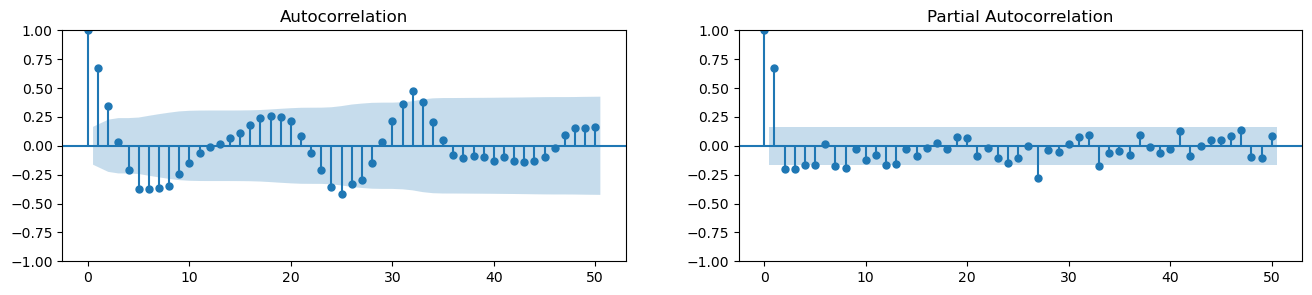

In [51]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(residuos2_1.dropna(), lags=50, ax=axes[0])
plot_pacf(residuos2_1.dropna(), lags=50, ax=axes[1])

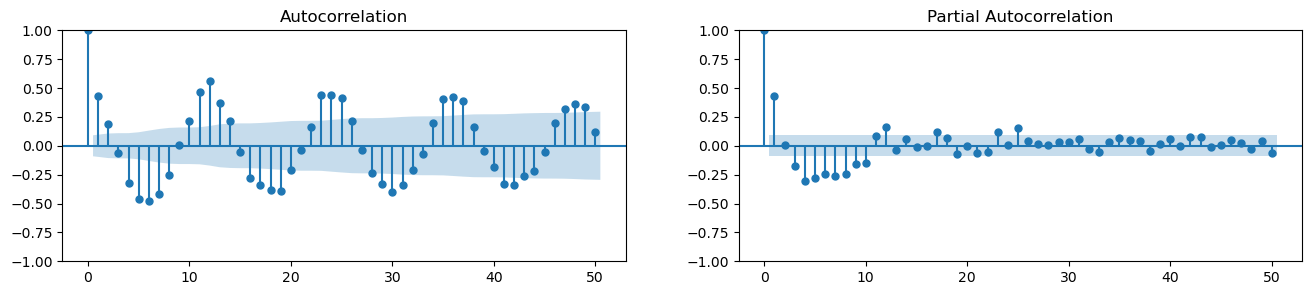

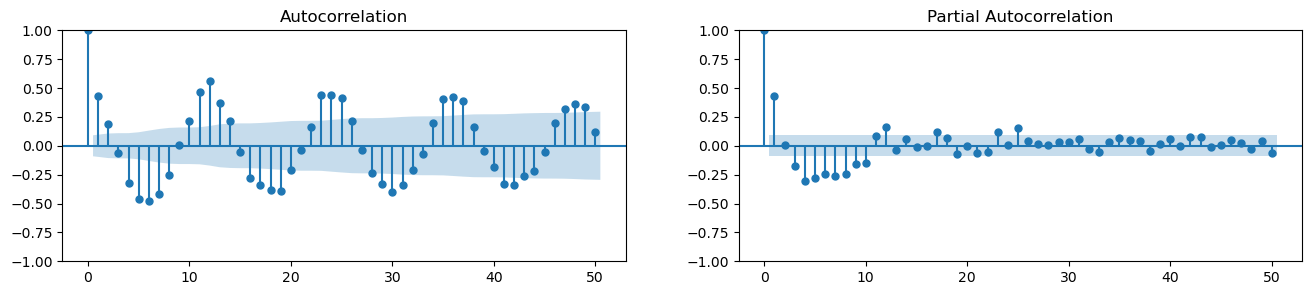

In [52]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(residuos3_1.dropna(), lags=50, ax=axes[0])
plot_pacf(residuos3_1.dropna(), lags=50, ax=axes[1])

## ACF y PACF en R

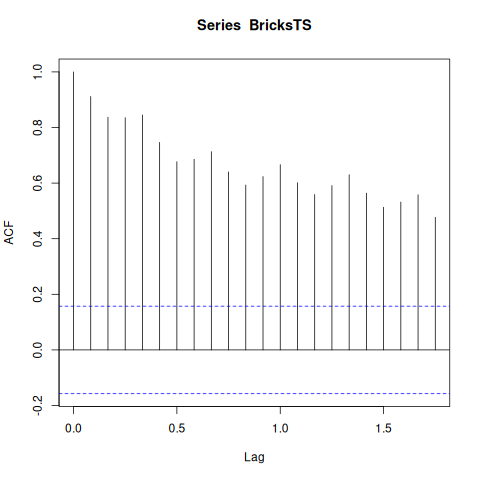

In [53]:
%%R
acf(BricksTS)

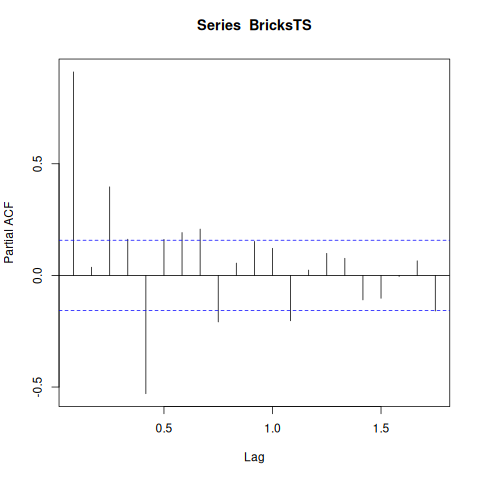

In [54]:
%%R
pacf(BricksTS)

# Session

In [55]:
import session_info
session_info.show(html=False,excludes=['dplyr','readxl','utils','base','stats','lubridate'])

-----
ipywidgets          7.8.5
matplotlib          3.10.6
numpy               2.3.3
pandas              2.3.3
rpy2                NA
seaborn             0.13.2
session_info        v1.0.1
statsmodels         0.14.5
-----
IPython             9.6.0
jupyter_client      8.6.3
jupyter_core        5.8.1
jupyterlab          4.4.9
notebook            7.4.7
-----
Python 3.13.5 | packaged by conda-forge | (main, Jun 16 2025, 08:27:50) [GCC 13.3.0]
Linux-6.8.0-85-generic-x86_64-with-glibc2.39
-----
Session information updated at 2025-10-13 14:16
